# A triple pendulum

In [1]:
import sympy as sp
from sympy.physics.mechanics import dynamicsymbols

In [2]:
t = dynamicsymbols._t

m00, m01, m10, m11, m20, m21 = sp.symbols('m00 m01 m10 m11 m20 m21', positive=True)
l00, l01, l10, l11, l20, l21 = sp.symbols('l00 l01 l10 l11 l20 l21', positive=True)
g = sp.symbols('g', positive=True)

phi0, phi1, phi2 = dynamicsymbols('phi_0 phi_1 phi_2')

In [3]:
r00 = l00 * sp.Matrix([sp.cos(phi0), sp.sin(phi0)])
r01 = - l01 * r00 / l00
r10 = l10 * sp.Matrix([sp.cos(phi1), sp.sin(phi1)])
r11 = - l11 * r10 / l10
r20 = l20 * sp.Matrix([sp.cos(phi2), sp.sin(phi2)])
r21 = - l21 * r20 / l20

x0 = sp.Matrix([0, 0])
x1 = x0 + r01
x2 = x1 + r11

x00 = x0 + r00
x01 = x0 + r01
x10 = x1 + r10
x11 = x1 + r11
x20 = x2 + r20
x21 = x2 + r21

x00d = x00.diff(t)
x01d = x01.diff(t)
x10d = x10.diff(t)
x11d = x11.diff(t)
x20d = x20.diff(t)
x21d = x21.diff(t)

In [4]:
T = sp.Rational(1, 2) * (
    m00 * x00d.dot(x00d)
    + m01 * x01d.dot(x01d)
    + m10 * x10d.dot(x10d)
    + m11 * x11d.dot(x11d)
    + m20 * x20d.dot(x20d)
    + m21 * x21d.dot(x21d)
)

V = g * (
    m00 * x00[1]
    + m01 * x01[1]
    + m10 * x10[1]
    + m11 * x11[1]
    + m20 * x20[1]
    + m21 * x21[1]
)

L = T - V

In [5]:
q = sp.Matrix([phi0, phi1, phi2])
qd = q.diff(t)

In [6]:
eoms = sp.Matrix(
    [
        L.diff(qdj).diff(t)
        - L.diff(qj)
        for qj, qdj in zip(q, qd)
    ]
)
eoms = sp.simplify(eoms)
eoms

Matrix([
[g*l00*m00*cos(phi_0(t)) - g*l01*m01*cos(phi_0(t)) - g*l01*m10*cos(phi_0(t)) - g*l01*m11*cos(phi_0(t)) - g*l01*m20*cos(phi_0(t)) - g*l01*m21*cos(phi_0(t)) + l00**2*m00*Derivative(phi_0(t), (t, 2)) + l01**2*m01*Derivative(phi_0(t), (t, 2)) + l01**2*m10*Derivative(phi_0(t), (t, 2)) + l01**2*m11*Derivative(phi_0(t), (t, 2)) + l01**2*m20*Derivative(phi_0(t), (t, 2)) + l01**2*m21*Derivative(phi_0(t), (t, 2)) - l01*l10*m10*sin(phi_0(t) - phi_1(t))*Derivative(phi_1(t), t)**2 - l01*l10*m10*cos(phi_0(t) - phi_1(t))*Derivative(phi_1(t), (t, 2)) + l01*l11*m11*sin(phi_0(t) - phi_1(t))*Derivative(phi_1(t), t)**2 + l01*l11*m11*cos(phi_0(t) - phi_1(t))*Derivative(phi_1(t), (t, 2)) + l01*l11*m20*sin(phi_0(t) - phi_1(t))*Derivative(phi_1(t), t)**2 + l01*l11*m20*cos(phi_0(t) - phi_1(t))*Derivative(phi_1(t), (t, 2)) + l01*l11*m21*sin(phi_0(t) - phi_1(t))*Derivative(phi_1(t), t)**2 + l01*l11*m21*cos(phi_0(t) - phi_1(t))*Derivative(phi_1(t), (t, 2)) - l01*l20*m20*sin(phi_0(t) - phi_2(t))*Derivativ

In [10]:
from matplotlib import pyplot as plt
import numpy as np

In [12]:
x01_ = sp.lambdify([t, phi0, phi1, phi2, l00, l01, l10, l11, l20, l21], x01)
x00_ = sp.lambdify([t, phi0, phi1, phi2, l00, l01, l10, l11, l20, l21], x00)
x11_ = sp.lambdify([t, phi0, phi1, phi2, l00, l01, l10, l11, l20, l21], x11)
x10_ = sp.lambdify([t, phi0, phi1, phi2, l00, l01, l10, l11, l20, l21], x10)
x21_ = sp.lambdify([t, phi0, phi1, phi2, l00, l01, l10, l11, l20, l21], x21)
x20_ = sp.lambdify([t, phi0, phi1, phi2, l00, l01, l10, l11, l20, l21], x20)

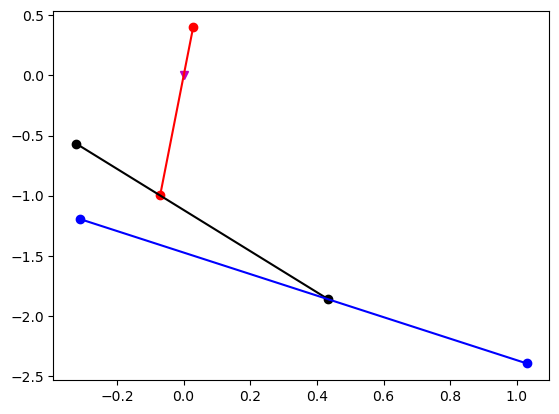

In [25]:
plt.plot(0, 0, 'mv')
plt.plot(*x01_(0, 1.5, 2.1, -0.73, .4, 1, .5, 1, .8, 1), 'ro')
plt.plot(*x00_(0, 1.5, 2.1, -0.73, .4, 1, .5, 1, .8, 1), 'ro')
plt.plot(*np.hstack((
    x01_(0, 1.5, 2.1, -0.73, .4, 1, .5, 1, .8, 1), 
    x00_(0, 1.5, 2.1, -0.73, .4, 1, .5, 1, .8, 1),
)), 'r-')
plt.plot(*x11_(0, 1.5, 2.1, -0.73, .4, 1, .5, 1, .8, 1), 'ko')
plt.plot(*x10_(0, 1.5, 2.1, -0.73, .4, 1, .5, 1, .8, 1), 'ko')
plt.plot(*np.hstack((
    x11_(0, 1.5, 2.1, -0.73, .4, 1, .5, 1, .8, 1), 
    x10_(0, 1.5, 2.1, -0.73, .4, 1, .5, 1, .8, 1),
)), 'k-')
plt.plot(*x21_(0, 1.5, 2.1, -0.73, .4, 1, .5, 1, .8, 1), 'bo')
plt.plot(*x20_(0, 1.5, 2.1, -0.73, .4, 1, .5, 1, .8, 1), 'bo')
plt.plot(*np.hstack((
    x21_(0, 1.5, 2.1, -0.73, .4, 1, .5, 1, .8, 1), 
    x20_(0, 1.5, 2.1, -0.73, .4, 1, .5, 1, .8, 1),
)), 'b-')

In [14]:
eoms

Matrix([
[g*l00*m00*cos(phi_0(t)) - g*l01*m01*cos(phi_0(t)) - g*l01*m10*cos(phi_0(t)) - g*l01*m11*cos(phi_0(t)) - g*l01*m20*cos(phi_0(t)) - g*l01*m21*cos(phi_0(t)) + l00**2*m00*Derivative(phi_0(t), (t, 2)) + l01**2*m01*Derivative(phi_0(t), (t, 2)) + l01**2*m10*Derivative(phi_0(t), (t, 2)) + l01**2*m11*Derivative(phi_0(t), (t, 2)) + l01**2*m20*Derivative(phi_0(t), (t, 2)) + l01**2*m21*Derivative(phi_0(t), (t, 2)) - l01*l10*m10*sin(phi_0(t) - phi_1(t))*Derivative(phi_1(t), t)**2 - l01*l10*m10*cos(phi_0(t) - phi_1(t))*Derivative(phi_1(t), (t, 2)) + l01*l11*m11*sin(phi_0(t) - phi_1(t))*Derivative(phi_1(t), t)**2 + l01*l11*m11*cos(phi_0(t) - phi_1(t))*Derivative(phi_1(t), (t, 2)) + l01*l11*m20*sin(phi_0(t) - phi_1(t))*Derivative(phi_1(t), t)**2 + l01*l11*m20*cos(phi_0(t) - phi_1(t))*Derivative(phi_1(t), (t, 2)) + l01*l11*m21*sin(phi_0(t) - phi_1(t))*Derivative(phi_1(t), t)**2 + l01*l11*m21*cos(phi_0(t) - phi_1(t))*Derivative(phi_1(t), (t, 2)) - l01*l20*m20*sin(phi_0(t) - phi_2(t))*Derivativ

In [15]:
M, F = sp.linear_eq_to_matrix(sp.simplify(sp.Matrix(eoms)), list(q.diff(t).diff(t)))

In [26]:
M

Matrix([
[                                                                               l00**2*m00 + l01**2*m01 + l01**2*m10 + l01**2*m11 + l01**2*m20 + l01**2*m21, -l01*l10*m10*cos(phi_0(t) - phi_1(t)) + l01*l11*m11*cos(phi_0(t) - phi_1(t)) + l01*l11*m20*cos(phi_0(t) - phi_1(t)) + l01*l11*m21*cos(phi_0(t) - phi_1(t)), -l01*l20*m20*cos(phi_0(t) - phi_2(t)) + l01*l21*m21*cos(phi_0(t) - phi_2(t))],
[-l01*l10*m10*cos(phi_0(t) - phi_1(t)) + l01*l11*m11*cos(phi_0(t) - phi_1(t)) + l01*l11*m20*cos(phi_0(t) - phi_1(t)) + l01*l11*m21*cos(phi_0(t) - phi_1(t)),                                                                                                          l10**2*m10 + l11**2*m11 + l11**2*m20 + l11**2*m21, -l11*l20*m20*cos(phi_1(t) - phi_2(t)) + l11*l21*m21*cos(phi_1(t) - phi_2(t))],
[                                                                              -l01*l20*m20*cos(phi_0(t) - phi_2(t)) + l01*l21*m21*cos(phi_0(t) - phi_2(t)),                                                   

In [27]:
F

Matrix([
[-g*l00*m00*cos(phi_0(t)) + g*l01*m01*cos(phi_0(t)) + g*l01*m10*cos(phi_0(t)) + g*l01*m11*cos(phi_0(t)) + g*l01*m20*cos(phi_0(t)) + g*l01*m21*cos(phi_0(t)) + l01*l10*m10*sin(phi_0(t) - phi_1(t))*Derivative(phi_1(t), t)**2 - l01*l11*m11*sin(phi_0(t) - phi_1(t))*Derivative(phi_1(t), t)**2 - l01*l11*m20*sin(phi_0(t) - phi_1(t))*Derivative(phi_1(t), t)**2 - l01*l11*m21*sin(phi_0(t) - phi_1(t))*Derivative(phi_1(t), t)**2 + l01*l20*m20*sin(phi_0(t) - phi_2(t))*Derivative(phi_2(t), t)**2 - l01*l21*m21*sin(phi_0(t) - phi_2(t))*Derivative(phi_2(t), t)**2],
[                                                    -g*l10*m10*cos(phi_1(t)) + g*l11*m11*cos(phi_1(t)) + g*l11*m20*cos(phi_1(t)) + g*l11*m21*cos(phi_1(t)) - l01*l10*m10*sin(phi_0(t) - phi_1(t))*Derivative(phi_0(t), t)**2 + l01*l11*m11*sin(phi_0(t) - phi_1(t))*Derivative(phi_0(t), t)**2 + l01*l11*m20*sin(phi_0(t) - phi_1(t))*Derivative(phi_0(t), t)**2 + l01*l11*m21*sin(phi_0(t) - phi_1(t))*Derivative(phi_0(t), t)**2 + l11*l20*m20*sin

In [17]:
par_syms = (m00, m01, m10, m11, m20, m21, l00, l01, l10, l11, l20, l21, g)

M_func = sp.lambdify((t, q, qd, par_syms), M, modules='numpy')
F_func = sp.lambdify((t, q, qd, par_syms), F, modules='numpy')

In [18]:
def rhs(t_num, y, par):
    q_num  = y[0:3]
    qd_num = y[3:6]
    M_num = np.array(M_func(t_num, q_num, qd_num, par), dtype=float)
    F_num = np.array(F_func(t_num, q_num, qd_num, par), dtype=float).reshape(3)

    qdd_num = np.linalg.solve(M_num, F_num)

    return np.concatenate([qd_num, qdd_num])

q0   = np.array([0.101, 0.0, 0.0])
qd0  = np.array([0.0, 0.0, 0.0])
y0   = np.concatenate([q0, qd0])

t_span = (0.0, 10.0)
t_eval = np.linspace(t_span[0], t_span[1], 2001)

par = (.1, .2, .1, .2, .1, .2, .2, .2, .2, .2, .2, .2, 9.81)
assert len(par) == len(par_syms)

In [19]:
from scipy.integrate import solve_ivp

In [20]:
sol = solve_ivp(lambda tt, yy: rhs(tt, yy, par), t_span, y0)

In [21]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.846e-05 ...  9.972e+00  1.000e+01]
        y: [[ 1.010e-01  1.010e-01 ...  1.503e+00  1.580e+00]
            [ 0.000e+00  4.211e-09 ... -8.180e-01 -8.592e-01]
            ...
            [ 0.000e+00  2.959e-04 ... -1.868e+00 -1.083e+00]
            [ 0.000e+00  5.381e-05 ... -6.707e+00 -6.539e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 914
     njev: 0
      nlu: 0

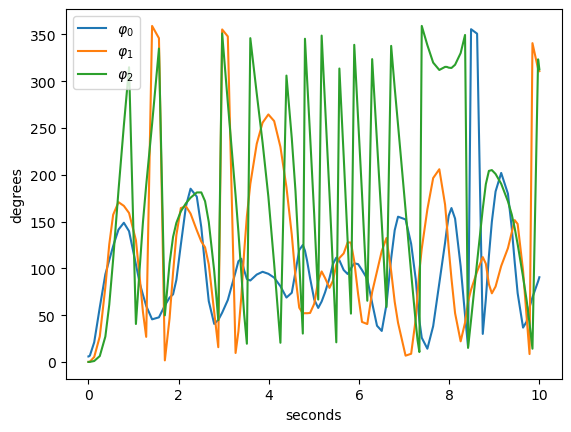

In [22]:
plt.plot(sol.t, np.rad2deg(sol.y[:3, :].T) % 360)
plt.legend(['$\\varphi_0$', '$\\varphi_1$', '$\\varphi_2$'])
plt.ylabel('degrees')
plt.xlabel('seconds');